here are the sales examples. Columns:

Month: gives you the month of the year. From 03.2018 to 11.2022
All other columns: your products sales, containing Region - Brand - Product information.

Eg. column: Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
Split column name with strsplit(" - ") and you get:
Дальневосточный ФО  -> geographical region
AGALATES -> molecule
Agalates tabs 0.5 mg #2 -> concrete product

So if the goal is to build a hierarchy, we can build it:
Leaves: products
Parents: molecules
Parents of parents: regions

:*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from utils.hts_eda_utils import get_zero_columns, remove_zero_columns
from utils import hts_eda_utils

In [2]:
original_df = pd.read_excel('data/Quarterly_smoothing.xlsx', index_col=0)

In [3]:
df = original_df.iloc[:, :20]

print("Shape", df.shape)
df.head()

Shape (57, 20)


,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Month,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,0,948,35,87,79,0,0,0,0,0,1038,0,1150,1081
2018-04-01,1000,0,0,9,0,0,0,1036,35,87,79,0,0,0,0,0,3219,1903,1550,9207
2018-05-01,1731,0,0,301,0,0,0,1245,93,147,18,19,0,0,0,0,4522,2220,1700,10998
2018-06-01,2090,0,0,490,0,0,0,1786,183,103,72,19,4,100,0,0,5125,2250,1050,25764
2018-07-01,1547,0,60,490,0,0,0,4131,183,103,72,19,24,100,0,0,3633,377,650,20549


### Plot signal of all drugs over time - see patterns

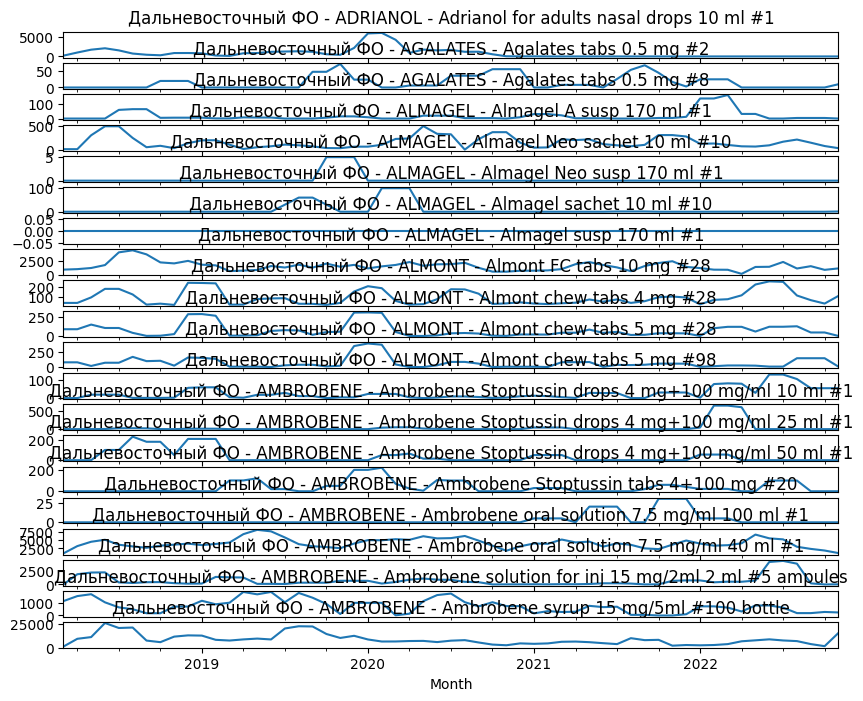

In [4]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 8), sharex=True)
for i, column in enumerate(df.columns):
    df[column].plot(ax=axes[i])
    axes[i].set_title(column)
    # axes[i].set_ylabel('Value')

## Correlation between the months

<font color="green">Pairwise using pandas.corr()</font>

In [5]:
dfT = original_df.T
dfT.shape

(2254, 57)

<font color="cyan">I see a lot of correlated dates</font>

In [6]:
dfT.corr().head()

Month,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01
Month,,,,,,,,,,,,,,,,,,,,,
2018-03-01,1.000000,0.688540,0.650474,0.458229,0.454746,0.527652,0.595043,0.532067,0.525809,0.504377,...,0.424621,0.449517,0.400025,0.399246,0.415794,0.475518,0.404347,0.403712,0.459449,0.553518
2018-04-01,0.688540,1.000000,0.924927,0.819634,0.506495,0.530967,0.579802,0.504569,0.536921,0.539555,...,0.562716,0.794682,0.612139,0.558681,0.442073,0.455390,0.372633,0.391830,0.478934,0.542869
2018-05-01,0.650474,0.924927,1.000000,0.914240,0.683922,0.592704,0.635526,0.556895,0.605321,0.609775,...,0.631696,0.794537,0.628384,0.595824,0.501021,0.530340,0.431417,0.439186,0.538673,0.586414
2018-06-01,0.458229,0.819634,0.914240,1.000000,0.818568,0.716749,0.606773,0.514092,0.590874,0.673033,...,0.670830,0.798325,0.656397,0.652878,0.533962,0.581448,0.514407,0.545897,0.612168,0.579522
2018-07-01,0.454746,0.506495,0.683922,0.818568,1.000000,0.897403,0.761972,0.525435,0.620760,0.744316,...,0.644925,0.603295,0.592414,0.652076,0.620347,0.656065,0.591614,0.640368,0.701299,0.638724


Laura, have you seen this, some interesting pattens here.

Beware: colorbar in range $[0.4, 1]$, so <font color="red">red squares</font> are overemphasized. TODO Ariel fix this to [-1,1]

<font color='pink'>So all months are positively correlated with each other?</font>

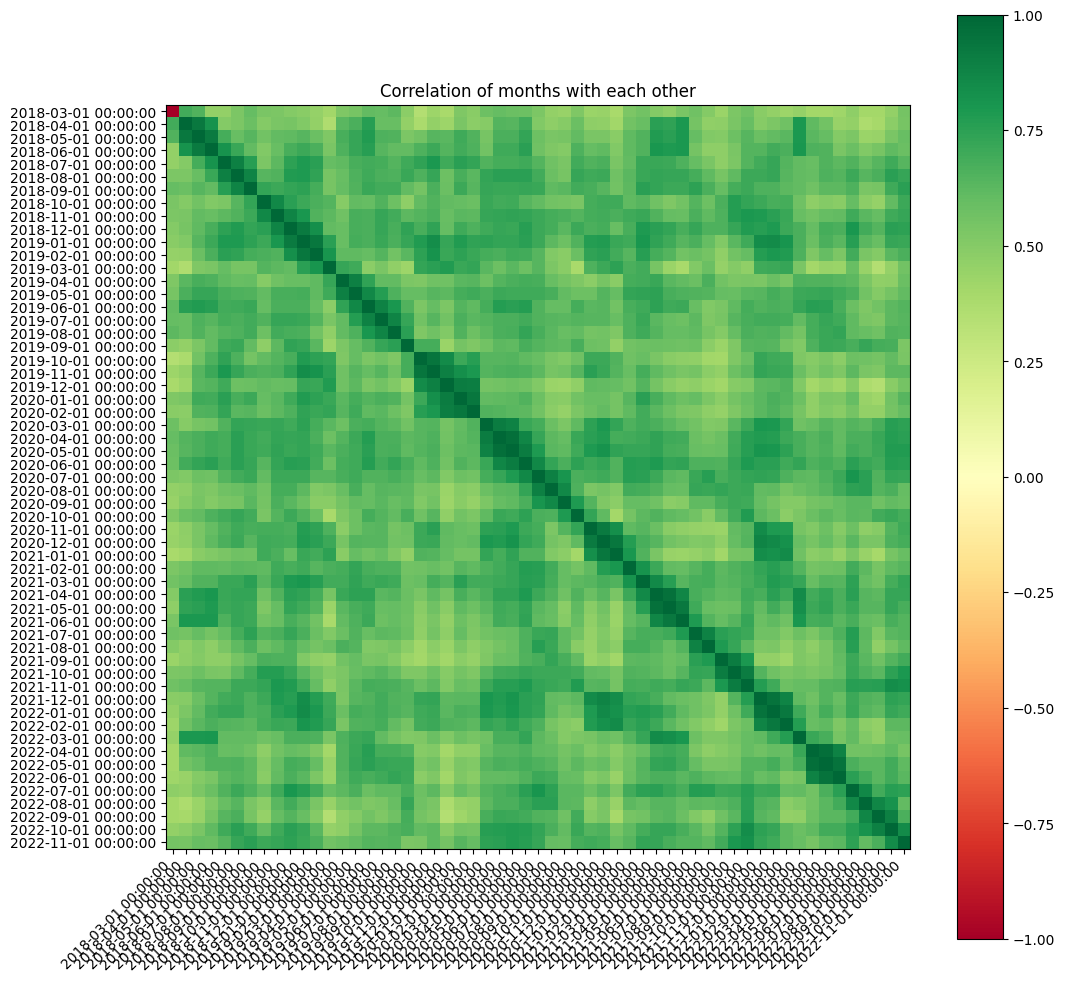

In [7]:
plt.figure(figsize=(12, 12))

monthsCorr = dfT.corr()

monthsCorr.iloc[0,0] = -1 # To plot colorbar in correct range

plt.imshow(monthsCorr, cmap='RdYlGn')#, interpolation='nearest')

num_columns = len(dfT.columns)
plt.xticks(range(num_columns), dfT.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), dfT.columns)

plt.title('Correlation of months with each other')

plt.colorbar()#extend='min')

Note I added $[0,0] = -1$ for colorbar to plot the correct range. <font color='gold'>TODO fix this more elegantly</font>

In [8]:
print("Min: ", monthsCorr.min(axis=None)) # Both axes
print("Max: ", monthsCorr.max(axis=None))

Min:  -1.0
Max:  1.0


### Histogram of correlations (at lag=0)

<font color='gray'>Getting just upper-diagonal of matrix (without diagonal, which is =1)</font>

In [9]:
lower_diag_corr = []

corr_arr = np.array(original_df.corr())

for i in range(corr_arr.shape[0]):
    for j in range(i):
        lower_diag_corr.append(corr_arr[i,j])

(array([4.00000e+00, 1.50000e+01, 2.00000e+01, 4.90000e+01, 9.20000e+01,
        1.24000e+02, 2.20000e+02, 2.83000e+02, 4.74000e+02, 7.65000e+02,
        1.09800e+03, 1.69600e+03, 2.55400e+03, 3.79300e+03, 5.59000e+03,
        7.95200e+03, 1.18720e+04, 1.70220e+04, 2.40350e+04, 3.31800e+04,
        4.45840e+04, 5.88240e+04, 7.52990e+04, 9.25750e+04, 1.11458e+05,
        1.27795e+05, 1.40315e+05, 1.46140e+05, 1.36834e+05, 1.09976e+05,
        1.02078e+05, 9.69910e+04, 9.23470e+04, 8.78550e+04, 8.38440e+04,
        7.91260e+04, 7.43550e+04, 6.95820e+04, 6.55820e+04, 6.02720e+04,
        5.61800e+04, 5.13250e+04, 4.70220e+04, 4.31510e+04, 3.93330e+04,
        3.54410e+04, 3.13040e+04, 2.82730e+04, 2.50040e+04, 2.20420e+04,
        1.93080e+04, 1.68790e+04, 1.47100e+04, 1.27790e+04, 1.09200e+04,
        9.08200e+03, 7.62800e+03, 6.51700e+03, 5.42300e+03, 4.79300e+03,
        3.48700e+03, 2.90500e+03, 2.31000e+03, 1.76400e+03, 1.49100e+03,
        1.20500e+03, 1.05100e+03, 8.43000e+02, 6.47

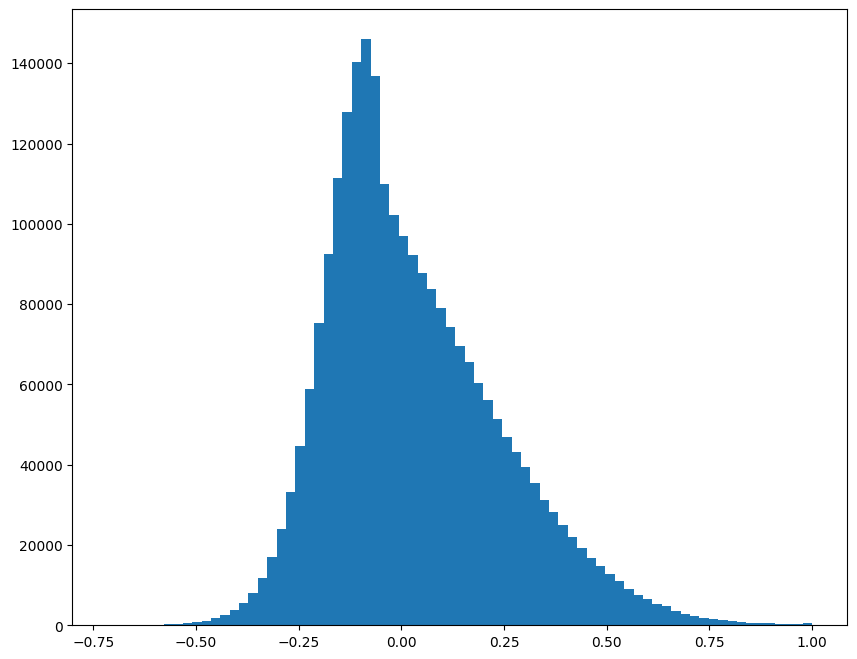

In [10]:
plt.figure(figsize=(10,8))

plt.hist(lower_diag_corr, bins=75)

<font color='turquoise'>So most drugs are in $[-.25, .25], and quite a lot are more correlated than that!</font>

<font color='pink'>What does median being negative mean business-side?</font>

Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10 is full of 0-s. <font color='orange'> removing all columns that are fully 0 </font>

In [11]:
get_zero_columns(df)

Index(['Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10'], dtype='object')

In [12]:
df = remove_zero_columns(df)

Removing 1 columns with all zeros


In [13]:
correlation_results = df.corr()
correlation_results.head(5)

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.000000,-0.109353,-0.154337,0.102190,0.045741,0.523890,0.106018,0.279303,0.493383,0.617476,-0.188798,-0.122880,0.030896,0.586774,-0.256264,0.323436,-0.014880,0.310582,0.240708
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,-0.109353,1.000000,0.005038,-0.017640,0.369342,-0.085731,-0.162789,-0.208054,-0.200239,-0.112437,-0.293043,-0.012984,-0.228964,-0.040836,0.024808,-0.316324,-0.283012,-0.154895,-0.078391
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.154337,0.005038,1.000000,-0.009920,-0.036536,-0.169566,0.075201,-0.084079,-0.037326,-0.096670,0.129383,0.689970,0.254283,-0.100433,0.012317,-0.072202,-0.096535,-0.095227,-0.143120
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.102190,-0.017640,-0.009920,1.000000,-0.214516,-0.032268,0.285173,0.149354,-0.056045,-0.073096,-0.044800,-0.093372,0.129330,-0.144362,0.180760,0.080991,0.141813,-0.007888,0.105267
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.045741,0.369342,-0.036536,-0.214516,1.000000,0.014373,0.053428,-0.070780,0.178489,0.164061,-0.170777,-0.069619,-0.129098,0.270583,-0.095238,-0.152848,-0.029590,-0.033524,0.156816


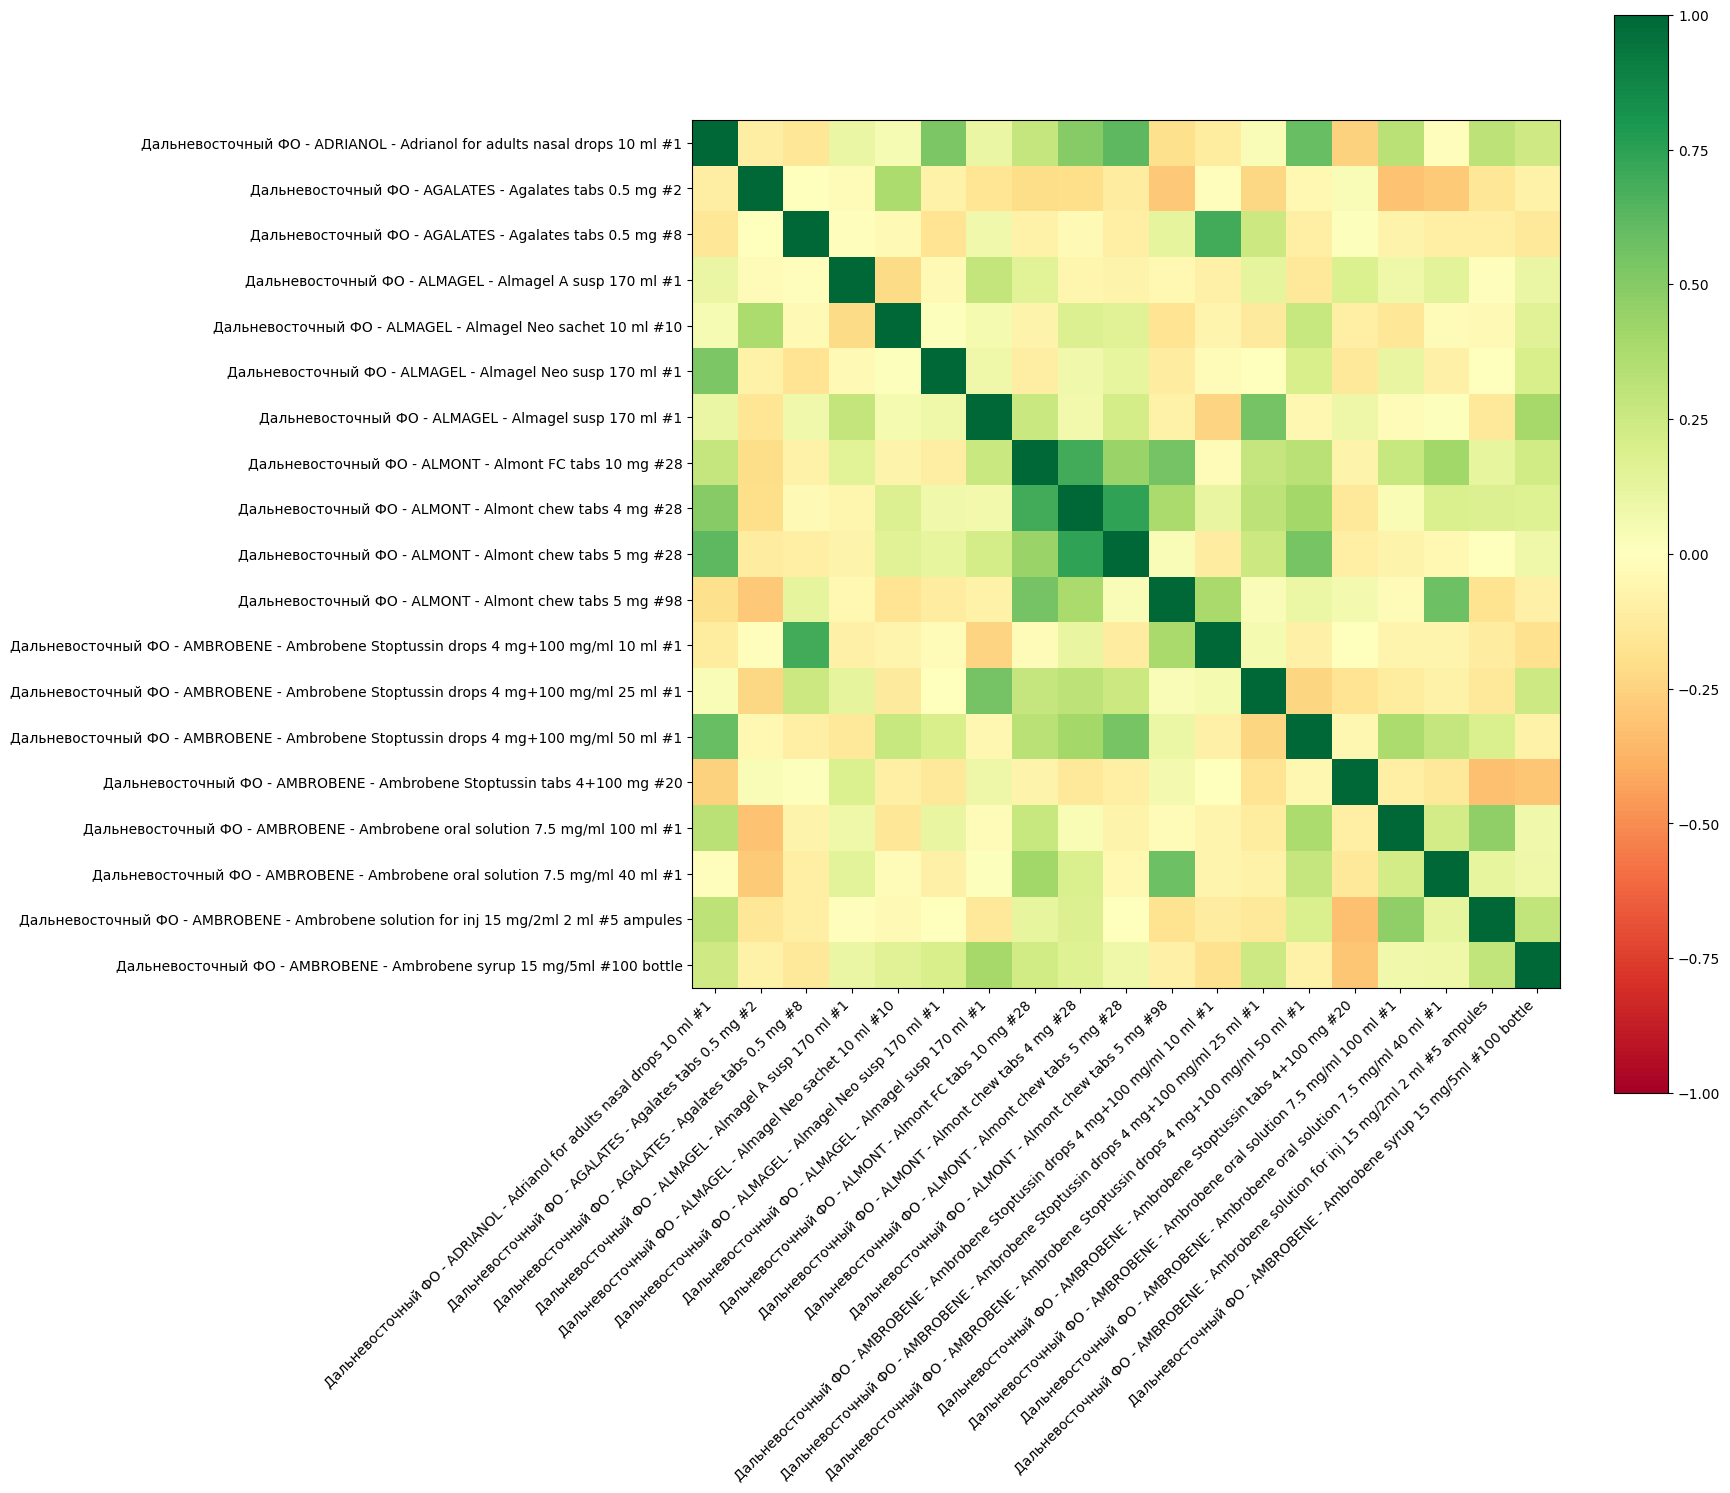

In [14]:
plt.figure(figsize=(14, 14))

plt.imshow(correlation_results, cmap='RdYlGn', vmin=-1, vmax=1)

num_columns = len(df.columns)
plt.xticks(range(num_columns), df.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), df.columns)

plt.colorbar()

<font color='lime'>Wow, I expected drugs within same class to be much more correlated</font>

### Find the maximum correlation for each column

In [15]:
# Find the maximum correlation for each column, ignoring NaN in the diagonal
max_correlations = correlation_results.max().dropna()

# Print the results
for column, max_corr in max_correlations.items():
    other_column = correlation_results[column].idxmax()
    print(f"The maximum correlation for {column} is {max_corr:.2f} with {other_column}")


The maximum correlation for Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1 is 1.00 with Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1
The maximum correlation for Дальнево

### With Lag Period

In [ ]:
# TODO fix warnings in outptu

# Set the maximum lag level you want to consider
max_lag = 6

# Use Only 25/2000 drugs because this is so compute-expensive
df = original_df.iloc[:, :25]

# Create an empty DataFrame to store the correlation results
correlation_results_w_lag = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate correlations for each pair of time series at different lag levels
for col1 in df.columns:
    for col2 in df.columns:
        max_corr = -1
        max_lag_value = 0
        
        for lag in range(0, max_lag + 1):
            # Shift the second time series by the current lag
            shifted_series = df[col2].shift(lag)
            
            # Combine the two time series into a single DataFrame
            combined_df = pd.concat([df[col1], shifted_series], axis=1).dropna()

            
            # Calculate correlation between the two time series
            corr_matrix = np.corrcoef(combined_df.iloc[:, 0], combined_df.iloc[:, 1])
            corr = corr_matrix[0, 1]
            
            # Update max correlation and lag if a higher correlation is found
            if corr > max_corr:
                max_corr = corr
                max_lag_value = lag
        
        correlation_results_w_lag.loc[col1, col2] = f'{max_corr:.2f} (at lag {max_lag_value})'

In [17]:
correlation_results_w_lag.head()

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,...,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle,Дальневосточный ФО - AMBROBENE - Ambrobene tabs 30 mg #20,Дальневосточный ФО - AMBROBENE - Stoptussin tabs 4 mg + 100 mg #20,Дальневосточный ФО - AMLODIPINE-TEVA - Amlodipine-Teva tabs 10 mg #30,Дальневосточный ФО - AMLODIPINE-TEVA - Amlodipine-Teva tabs 5 mg #30,Дальневосточный ФО - ANASTROSOLE - Anastrozole-Teva FC tabs 1 mg #28
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.00 (at lag 0),0.22 (at lag 3),-0.14 (at lag 2),0.10 (at lag 0),0.86 (at lag 3),0.55 (at lag 5),-1.00 (at lag 0),0.11 (at lag 0),0.28 (at lag 0),0.55 (at lag 1),...,-0.25 (at lag 5),0.32 (at lag 0),0.03 (at lag 1),0.37 (at lag 6),0.65 (at lag 6),0.04 (at lag 1),0.17 (at lag 0),0.07 (at lag 0),0.29 (at lag 6),0.06 (at lag 0)
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,0.22 (at lag 6),1.00 (at lag 0),0.01 (at lag 0),0.28 (at lag 5),0.37 (at lag 0),0.19 (at lag 6),-1.00 (at lag 0),0.28 (at lag 3),-0.06 (at lag 4),-0.17 (at lag 6),...,0.30 (at lag 3),0.55 (at lag 5),0.09 (at lag 6),0.27 (at lag 5),0.14 (at lag 4),0.15 (at lag 5),0.24 (at lag 6),0.65 (at lag 5),0.29 (at lag 6),0.05 (at lag 5)
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.07 (at lag 4),0.42 (at lag 6),1.00 (at lag 0),0.37 (at lag 3),-0.03 (at lag 6),-0.01 (at lag 3),-1.00 (at lag 0),0.08 (at lag 0),-0.03 (at lag 3),-0.04 (at lag 0),...,0.69 (at lag 3),-0.05 (at lag 1),0.06 (at lag 2),-0.10 (at lag 0),-0.05 (at lag 1),0.29 (at lag 1),-0.08 (at lag 1),0.02 (at lag 0),-0.01 (at lag 0),0.32 (at lag 0)
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.40 (at lag 4),0.30 (at lag 6),0.08 (at lag 5),1.00 (at lag 0),0.48 (at lag 6),0.28 (at lag 3),-1.00 (at lag 0),0.29 (at lag 0),0.15 (at lag 0),0.23 (at lag 5),...,0.18 (at lag 0),0.16 (at lag 1),0.24 (at lag 1),0.02 (at lag 5),0.11 (at lag 0),0.17 (at lag 5),0.32 (at lag 1),0.17 (at lag 1),0.08 (at lag 6),0.41 (at lag 0)
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.08 (at lag 3),0.46 (at lag 1),-0.04 (at lag 0),-0.14 (at lag 4),1.00 (at lag 0),0.39 (at lag 2),-1.00 (at lag 0),0.05 (at lag 0),-0.02 (at lag 5),0.18 (at lag 0),...,-0.10 (at lag 0),0.59 (at lag 6),-0.01 (at lag 6),0.47 (at lag 6),0.56 (at lag 3),0.08 (at lag 6),0.03 (at lag 5),0.41 (at lag 5),0.38 (at lag 3),-0.00 (at lag 0)


## Plot movie of correlation heatmap of data at various lags

## Prepping data for Hierarchical Time Series packages

In [18]:
df = original_df # This, or a version with less classes for compute efficiency

In [19]:
df = remove_zero_columns(df)

Removing 30 columns with all zeros


In [20]:
# Split the column names into components - this is the Hierarchy
columns_split = [col.split(' - ') for col in df.columns]
# columns_split[:10]

In [21]:
# Get the unique categories at each level of the hierarchy
hierarchy_nodes = [ set([col[i] for col in columns_split]) for i in range(0, len(columns_split[0]))]
hierarchy_nodes

[{'Дальневосточный ФО',
  'Приволжский ФО',
  'Северо-западный ФО',
  'Северо-кавказский ФО',
  'Сибирский ФО',
  'Уральский ФО',
  'Центральный ФО',
  'Южный ФО'},
 {'ADRIANOL',
  'AGALATES',
  'ALMAGEL',
  'ALMONT',
  'AMBROBENE',
  'AMLODIPINE-TEVA',
  'ANASTROSOLE',
  'ATORVASTATIN-TEVA',
  'AZILECT',
  'BECLASONE ECO',
  'BECLASONE ECO EASY-BREATHE',
  'BICALUTAMIDE',
  'BISOPROLOL-TEVA',
  'BUDENIT STERI-NEB',
  'CABAZITAXEL',
  'CARVEDILOL-TEVA',
  'CERUCAL',
  'CERUCAL (HOSP.)',
  'CETIRIZINE',
  'CIPROFLOXACIN-TEVA',
  'CISPLATIN-TEVA',
  'CLARITHROMYCIN-TEVA',
  'CLOBIR ',
  'CLOFARABINE',
  'CLOPIDOGREL ASK-TEVA',
  'CLOPIDOGREL-TEVA',
  'CLOTRIMAZOLE  ',
  'COLISTIN',
  'CONVULSOFIN',
  'COPAXONE 20',
  'COPAXONE 40',
  'CORDINORM',
  'CORINFAR FT',
  'CORINFAR RETARD RT',
  'CUPRENIL',
  'CYPROTERONE-TEVA',
  'Cinqeiro ',
  'DESAL',
  'DEZRINIT',
  'DICLOFENAC',
  'DIUVER',
  'DOLOBENE',
  'DOMPERIDONE-TEVA',
  'DOXAZOSIN-TEVA',
  'DROTAVERINE',
  'DUORESP SPIROMAX',
  'DU

<font color='gold'>Scikit-HTS needs a 'total' column at each level of the hierarchy - each node on tree except bottom-most</font>

GPT-4 output looks perfect compared to this https://github.com/carlomazzaferro/scikit-hts-examples/blob/master/notebooks/visnights.ipynb

In [ ]:
# Beware, chatgpt below :P
aggregated_df = pd.DataFrame()

# Split the columns into hierarchical levels by '-'
columns_split = [col.split(' - ') for col in df.columns]

# Get the unique top-level classes (regions)
regions = list(set([col[0] for col in columns_split if len(col) > 1]))

# AFAIK, HTS needs a 'total' column for each level in the hierarchy. I believe all tree nodes except bottom-most
# Create a dictionary to represent the hierarchy, starting with 'total'
hierarchy = {'total': regions}

# Iterate through regions: Дальневосточный ФО
for region in regions:
    # Drug Categories - 'ADRIANOL', 'AGALATES', 'ALMAGEL', 'ALMONT', 'AMBROBENE'
    categories = list(set([col[1] for col in columns_split if len(col) > 1 and col[0] == region]))
    region_key = region
    hierarchy[region_key] = [f'{region} - {category}' for category in categories]

    # Aggregate at the region level
    region_columns = [col for col in df.columns if col.startswith(f'{region} - ')]
    aggregated_df[region_key] = df[region_columns].sum(axis=1)

    # Iterate through Drug categories
    for category in categories:
        category_key = f'{region} - {category}'
        products = [col for col in df.columns if col.startswith(f'{region} - {category} - ')]
        hierarchy[category_key] = products

        # Aggregate at the category level
        category_columns = [col for col in df.columns if col.startswith(f'{region} - {category} - ')]
        aggregated_df[category_key] = df[category_columns].sum(axis=1)

# Concatenate the aggregated columns with the original DataFrame
df_with_aggregates = pd.concat([df, aggregated_df], axis=1)

# Add the "total" column across all columns
df_with_aggregates['total'] = df_with_aggregates.sum(axis=1)

In [23]:
print("hierarchy: ", hierarchy)
df_with_aggregates.head()

hierarchy:  {'total': ['Центральный ФО', 'Южный ФО', 'Северо-кавказский ФО', 'Уральский ФО', 'Дальневосточный ФО', 'Приволжский ФО', 'Северо-западный ФО', 'Сибирский ФО'], 'Центральный ФО': ['Центральный ФО - CYPROTERONE-TEVA', 'Центральный ФО - NEBIVOLOL-TEVA', 'Центральный ФО - SUMATRIPTAN-TEVA', 'Центральный ФО - ETOPOSIDE-TEVA', 'Центральный ФО - DYNAMICO', 'Центральный ФО - CISPLATIN-TEVA', 'Центральный ФО - CLOBIR ', 'Центральный ФО - CERUCAL', 'Центральный ФО - CONVULSOFIN', 'Центральный ФО - AZILECT', 'Центральный ФО - DUORESP SPIROMAX', 'Центральный ФО - FLUDARABINE-TEVA', 'Центральный ФО - IRINOTECAN', 'Центральный ФО - NAZAREL', 'Центральный ФО - ISOPRINOSINE', 'Центральный ФО - PRAMIPEXOL-TEVA', 'Центральный ФО - DOLOBENE', 'Центральный ФО - ANASTROSOLE', 'Центральный ФО - CLOPIDOGREL ASK-TEVA', 'Центральный ФО - ALMONT', 'Центральный ФО - STOPANGIN', 'Центральный ФО - ATORVASTATIN-TEVA', 'Центральный ФО - SPASMALGON', 'Центральный ФО - ONDANSETRON-TEVA', 'Центральный ФО - 

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,...,Сибирский ФО - TIZANIDINE-TEVA,Сибирский ФО - IMATINIB,Сибирский ФО - PACLITAXEL-TEVA,Сибирский ФО - SUMAMED,Сибирский ФО - INDOVASIN,Сибирский ФО - VESTIBO,Сибирский ФО - OXALIPLATIN-TEVA,Сибирский ФО - BUDENIT STERI-NEB,Сибирский ФО - ETORICOXIB,total
Month,,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,948,35,87,79,...,1120,454,0,6512,0,0,61,3325,80,17897274
2018-04-01,1000,0,0,9,0,0,1036,35,87,79,...,3597,791,2237,14697,0,0,991,6688,125,35666067
2018-05-01,1731,0,0,301,0,0,1245,93,147,18,...,3718,879,4084,28774,0,0,958,9449,290,47773767
2018-06-01,2090,0,0,490,0,0,1786,183,103,72,...,5819,473,5824,32451,0,0,1078,17485,360,48311469
2018-07-01,1547,0,60,490,0,0,4131,183,103,72,...,3667,235,4587,30776,0,0,2718,15935,355,43560981


### Regions Correlations

In [24]:
# Select out only region totals columns

df_with_aggregates[regions].head()

,Центральный ФО,Южный ФО,Северо-кавказский ФО,Уральский ФО,Дальневосточный ФО,Приволжский ФО,Северо-западный ФО,Сибирский ФО
Month,,,,,,,,
2018-03-01,1308975,765748,171682,584115,222209,1574388,796389,542252
2018-04-01,3223287,1428755,355648,1045269,670609,2810179,1261751,1093191
2018-05-01,5231526,1600191,492715,1515369,838533,3146739,1470867,1628649
2018-06-01,5819230,1635372,631166,1508359,1109312,2341856,1355751,1702777
2018-07-01,5634819,1415759,598231,1412320,894288,1936958,1173740,1454212


Correlations by Region


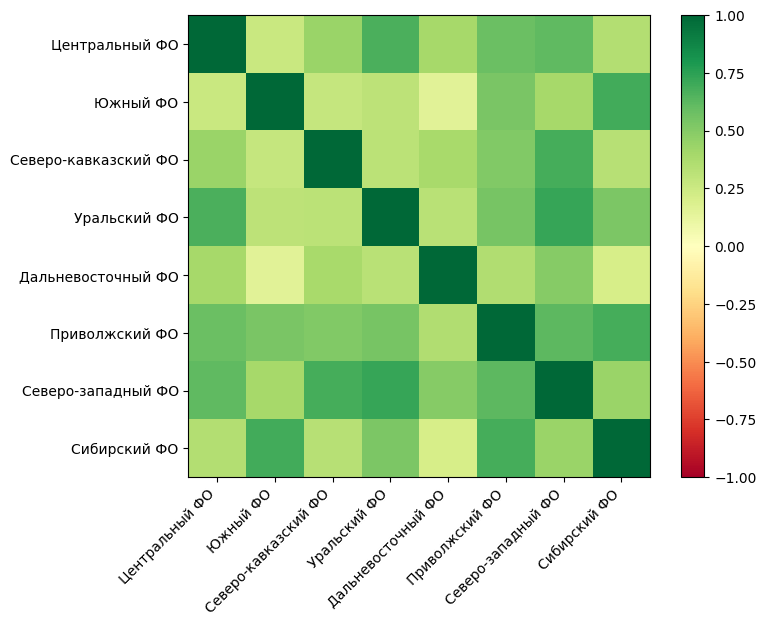

In [25]:
regions_corr = df_with_aggregates[regions].corr()

print("Correlations by Region")
hts_eda_utils.plot_correlations(regions_corr, figsize=(8,6))

In [26]:
regions_corr

,Центральный ФО,Южный ФО,Северо-кавказский ФО,Уральский ФО,Дальневосточный ФО,Приволжский ФО,Северо-западный ФО,Сибирский ФО
Центральный ФО,1.000000,0.263602,0.435621,0.671221,0.397459,0.585407,0.615465,0.350933
Южный ФО,0.263602,1.000000,0.278234,0.311614,0.152637,0.538721,0.396108,0.692261
Северо-кавказский ФО,0.435621,0.278234,1.000000,0.319010,0.385803,0.510028,0.679992,0.330096
Уральский ФО,0.671221,0.311614,0.319010,1.000000,0.323582,0.542902,0.718846,0.524181
Дальневосточный ФО,0.397459,0.152637,0.385803,0.323582,1.000000,0.359119,0.498093,0.210829
Приволжский ФО,0.585407,0.538721,0.510028,0.542902,0.359119,1.000000,0.619270,0.682158
Северо-западный ФО,0.615465,0.396108,0.679992,0.718846,0.498093,0.619270,1.000000,0.437430
Сибирский ФО,0.350933,0.692261,0.330096,0.524181,0.210829,0.682158,0.437430,1.000000


<font color='cyan'>Regions seem pretty correlated!</font>

## Scikit-hts

<font color="red">This package is not maintained. Cannot use with any model</font>

<font color="orange">I can bring it up to date if no alternative</font>

In [28]:
from hts import HTSRegressor

# No model choice seems to work - you cannot install them via pip
model = HTSRegressor()#model='auto_arima', revision_method='BU')
model = model.fit(df_with_aggregates, hierarchy)

Fitting models:   0%|          | 0/25 [00:01<?, ?it/s]prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]

prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Inst

AttributeError: 'NoneType' object has no attribute 'fit'